VISUALIZAION 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load play by play data
pbp = pd.read_csv('ista131_fp_nba2019-20_pbp.csv')

In [3]:
#display play by play data
pbp.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#What are the different shot types?
pbp['ShotType'].unique()

array([nan, '2-pt jump shot', '2-pt layup', '3-pt jump shot',
       '2-pt hook shot', '2-pt dunk'], dtype=object)

In [5]:
#What are the different shot outcomes?
pbp['ShotOutcome'].unique()

array([nan, 'miss', 'make'], dtype=object)

In [6]:
#Replace make and miss with corresponding numeric value
outcomes = {'make' : 1, 'miss': 0}

#Create column showing make (1) or miss (0)
pbp['ShotOutcomeNum'] = pbp['ShotOutcome'].map(outcomes)

In [7]:
#Get necessary columns and get rid of null rows
shot_type_outcome = pbp[(pd.notna(pbp['ShotType'])) & (pd.notna(pbp['ShotOutcomeNum']))][['ShotType','ShotOutcomeNum']]

In [8]:
shot_type_outcome

,ShotType,ShotOutcomeNum
1,2-pt jump shot,0.0
3,2-pt layup,1.0
4,2-pt layup,0.0
6,2-pt layup,0.0
8,3-pt jump shot,0.0
...,...,...
539255,3-pt jump shot,0.0
539258,3-pt jump shot,0.0
539260,2-pt layup,1.0
539261,3-pt jump shot,1.0


In [9]:
#ShotOutcomeNum is makes because it is counting all the 1.0s, so lets rename it for clarity
shot_type_outcome = shot_type_outcome.rename(columns = {'ShotOutcomeNum': 'Made'})

In [10]:
shot_type_outcome

,ShotType,Made
1,2-pt jump shot,0.0
3,2-pt layup,1.0
4,2-pt layup,0.0
6,2-pt layup,0.0
8,3-pt jump shot,0.0
...,...,...
539255,3-pt jump shot,0.0
539258,3-pt jump shot,0.0
539260,2-pt layup,1.0
539261,3-pt jump shot,1.0


In [11]:
#How many of each shot type were taken during the season
shot_type_counts = shot_type_outcome['ShotType'].value_counts()
shot_type_counts

ShotType
3-pt jump shot    78344
2-pt layup        55362
2-pt jump shot    51077
2-pt dunk         11740
2-pt hook shot     5874
Name: count, dtype: int64

In [12]:
#Groupby and aggregate to find total number of made shots for each shot type
shot_type_outcome = shot_type_outcome.groupby('ShotType').agg({'ShotType': 'count', 'Made': 'sum'})

In [13]:
shot_type_outcome

,ShotType,Made
ShotType,,
2-pt dunk,11740,10512.0
2-pt hook shot,5874,2787.0
2-pt jump shot,51077,21519.0
2-pt layup,55362,30200.0
3-pt jump shot,78344,28061.0


In [14]:
#Two columns are named the same above!! How would we rename the data accurately?
shot_type_outcome = shot_type_outcome.rename(columns = {'ShotType': 'ShotType', 'ShotType': 'ShotTypeTotal'})

In [15]:
shot_type_outcome

,ShotTypeTotal,Made
ShotType,,
2-pt dunk,11740,10512.0
2-pt hook shot,5874,2787.0
2-pt jump shot,51077,21519.0
2-pt layup,55362,30200.0
3-pt jump shot,78344,28061.0


In [16]:
#ShotType is still our index. How do we fix this?
shot_type_outcome = shot_type_outcome.reset_index()

In [17]:
shot_type_outcome

,ShotType,ShotTypeTotal,Made
0,2-pt dunk,11740,10512.0
1,2-pt hook shot,5874,2787.0
2,2-pt jump shot,51077,21519.0
3,2-pt layup,55362,30200.0
4,3-pt jump shot,78344,28061.0


In [18]:
#add percent made column
shot_type_outcome['PercentMade'] = round((shot_type_outcome['Made'] / shot_type_outcome['ShotTypeTotal']) * 100, 3)

In [19]:
shot_type_outcome

,ShotType,ShotTypeTotal,Made,PercentMade
0,2-pt dunk,11740,10512.0,89.540
1,2-pt hook shot,5874,2787.0,47.446
2,2-pt jump shot,51077,21519.0,42.131
3,2-pt layup,55362,30200.0,54.550
4,3-pt jump shot,78344,28061.0,35.818


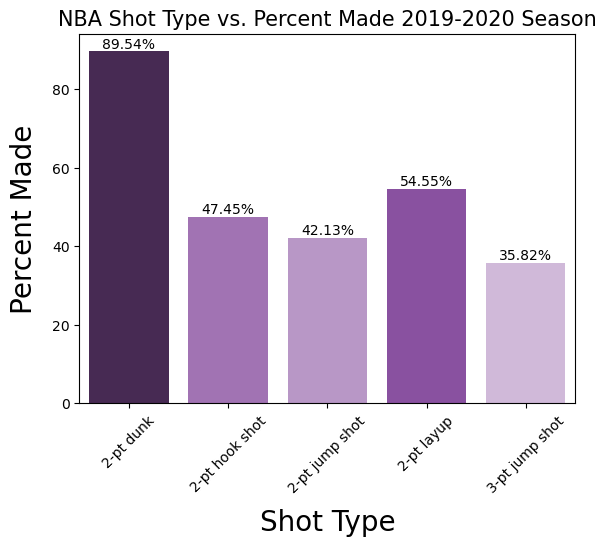

In [20]:
#Now lets create our visualization for each shot types percentage made
colors = ['#4A235A', '#A569BD', '#BB8FCE', '#8E44AD', '#D2B4DE']

#First, create the bar plot
barplt = sns.barplot(x = 'ShotType', y = "PercentMade", data = shot_type_outcome, palette=colors)

#Now customize the plot
plt.title('NBA Shot Type vs. Percent Made 2019-2020 Season', fontsize = 15)
plt.xlabel('Shot Type', fontsize = 20, labelpad = 10)
plt.ylabel('Percent Made', fontsize = 20, labelpad = 10)
plt.xticks(rotation = 45)



#Add values on top of each plot
#iterate through each bar in the barplot and use annotate to add % values
for p in barplt.patches:
    barplt.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


plt.show()

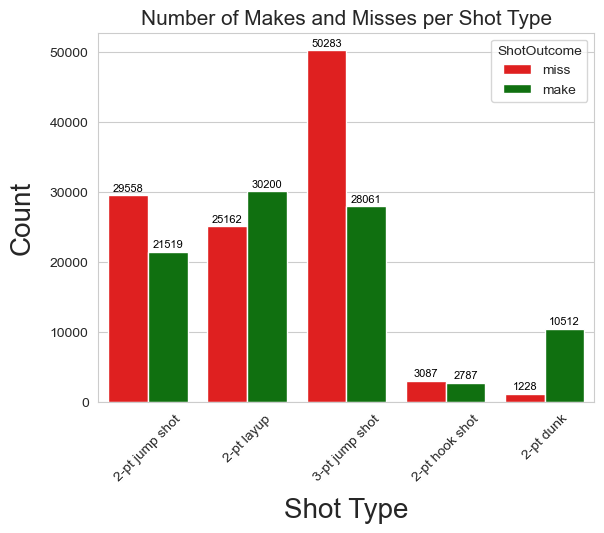

In [23]:
# Filter out rows with non-null values in 'ShotType' and 'ShotOutcomeNum'
shot_type_outcome = pbp[(pd.notna(pbp['ShotType'])) & (pd.notna(pbp['ShotOutcomeNum']))]

# Create a count plot to visualize the relationship between ShotType and ShotOutcomeNum, or the numbner of make/misses for each shot
countplt = sns.countplot(data=shot_type_outcome, x='ShotType', hue='ShotOutcome', palette={'make': 'green', 'miss': 'red'})


plt.title('Number of Makes and Misses per Shot Type', fontsize = 15)
plt.xlabel('Shot Type', fontsize = 20, labelpad = 10)
plt.ylabel('Count', fontsize = 20, labelpad = 10)

'''
loops through each individual bar (patche(s)) in the countplot - positioned at center of bars x coord and at the height of bar
ha, va: horizontal and vertical allignment
xytext: places text 5 units above the bar (yaxis)
textcoords: xytext
'''
for p in countplt.patches:
    countplt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.show()

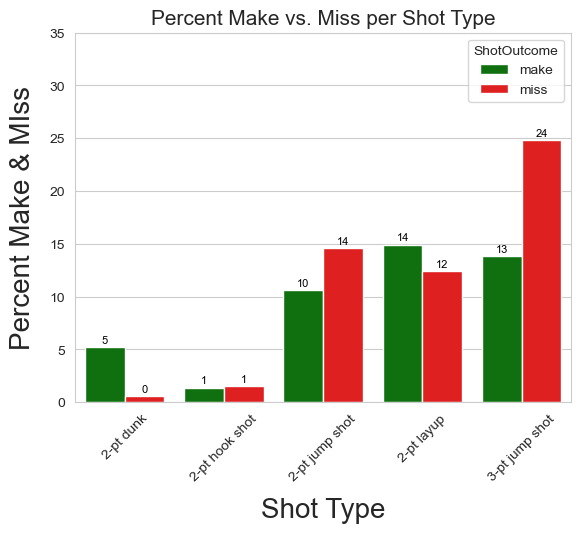

In [22]:
# Calculate the percentage of 'make' and 'miss' outcomes for each 'ShotType'
shot_percentage = shot_type_outcome.groupby(['ShotType', 'ShotOutcome'])['ShotOutcomeNum'].count() / len(shot_type_outcome) * 100
shot_percentage = shot_percentage.reset_index()

sns.set_style("whitegrid")

# Create a bar plot to visualize the percentage of 'make' and 'miss' outcomes for each 'ShotType'
barplt = sns.barplot(data=shot_percentage, x='ShotType', y='ShotOutcomeNum', hue='ShotOutcome', palette={'make': 'green', 'miss': 'red'})
plt.title('Percent Make vs. Miss per Shot Type', fontsize = 15)
plt.xlabel('Shot Type', fontsize = 20, labelpad = 10)
plt.ylabel('Percent Make & MIss', fontsize = 20, labelpad = 10)
plt.xticks(rotation=45)
plt.ylim(0, 35)  # Set the y-axis limit from 0 to 35 for percentage

for p in barplt.patches:
    barplt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()